**EDA and Visualization of the Titanic Dataset**

In \[3\]:

    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

**Loading The Dataset**

In \[11\]:

    # Load Titanic dataset from seaborn or CSV
    df = sns.load_dataset('titanic')
    # Display first few rows
    df.head()

Out\[11\]:

|     | survived | pclass | sex    | age  | sibsp | parch | fare    | embarked | class | who   | adult_male | deck | embark_town | alive | alone |
|-----|----------|--------|--------|------|-------|-------|---------|----------|-------|-------|------------|------|-------------|-------|-------|
| 0   | 0        | 3      | male   | 22.0 | 1     | 0     | 7.2500  | S        | Third | man   | True       | NaN  | Southampton | no    | False |
| 1   | 1        | 1      | female | 38.0 | 1     | 0     | 71.2833 | C        | First | woman | False      | C    | Cherbourg   | yes   | False |
| 2   | 1        | 3      | female | 26.0 | 0     | 0     | 7.9250  | S        | Third | woman | False      | NaN  | Southampton | yes   | True  |
| 3   | 1        | 1      | female | 35.0 | 1     | 0     | 53.1000 | S        | First | woman | False      | C    | Southampton | yes   | False |
| 4   | 0        | 3      | male   | 35.0 | 0     | 0     | 8.0500  | S        | Third | man   | True       | NaN  | Southampton | no    | True  |

**Data Cleaning**

> **Handle Missing Values**

In \[25\]:

    # Fill missing 'age' with median
    df['age'] = df['age'].fillna(df['age'].median())

    # Fill 'embarked' with mode
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

    # Drop 'deck' column only if it exists
    if 'deck' in df.columns:
        df = df.drop(columns=['deck'])

    # Drop remaining rows with any nulls
    df = df.dropna()

    # Show the shape of the cleaned dataset
    print("Shape after cleaning:", df.shape)

    # Display first few rows
    df.head()

    Shape after cleaning: (889, 14)

Out\[25\]:

|     | survived | pclass | sex    | age  | sibsp | parch | fare    | embarked | class | who   | adult_male | embark_town | alive | alone |
|-----|----------|--------|--------|------|-------|-------|---------|----------|-------|-------|------------|-------------|-------|-------|
| 0   | 0        | 3      | male   | 22.0 | 1     | 0     | 7.2500  | S        | Third | man   | True       | Southampton | no    | False |
| 1   | 1        | 1      | female | 38.0 | 1     | 0     | 71.2833 | C        | First | woman | False      | Cherbourg   | yes   | False |
| 2   | 1        | 3      | female | 26.0 | 0     | 0     | 7.9250  | S        | Third | woman | False      | Southampton | yes   | True  |
| 3   | 1        | 1      | female | 35.0 | 1     | 0     | 53.1000 | S        | First | woman | False      | Southampton | yes   | False |
| 4   | 0        | 3      | male   | 35.0 | 0     | 0     | 8.0500  | S        | Third | man   | True       | Southampton | no    | True  |

> **Removing Duplicates**

In \[42\]:

    # Check duplicates
    print("Duplicates are", df.duplicated().sum())

    # Remove them if found
    df.drop_duplicates(inplace=True)

    Duplicates are 0

> **Handling Outliers (e.g., using IQR method for "fare")**

In \[47\]:

    # Plot boxplot to identify outliers
    sns.boxplot(x=df['fare'])
    plt.title("Fare Boxplot")
    plt.show()

    # Remove extreme outliers using IQR
    Q1 = df['fare'].quantile(0.25)
    Q3 = df['fare'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR

    df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

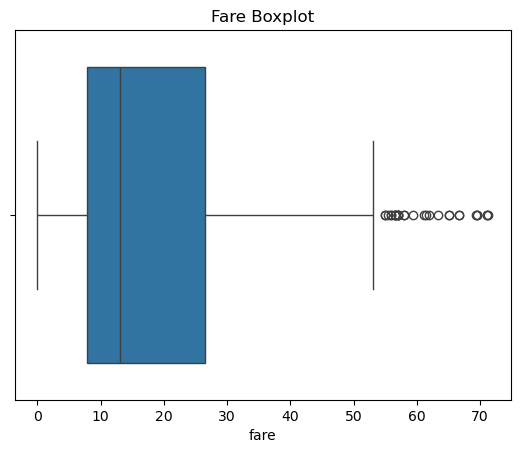

**Visualizations**

> **Bar Charts for Categorical Variables**

In \[53\]:

    categorical_cols = ['sex', 'class', 'embarked', 'who', 'survived']

    for col in categorical_cols:
        sns.countplot(x=col, data=df)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)
        plt.show()

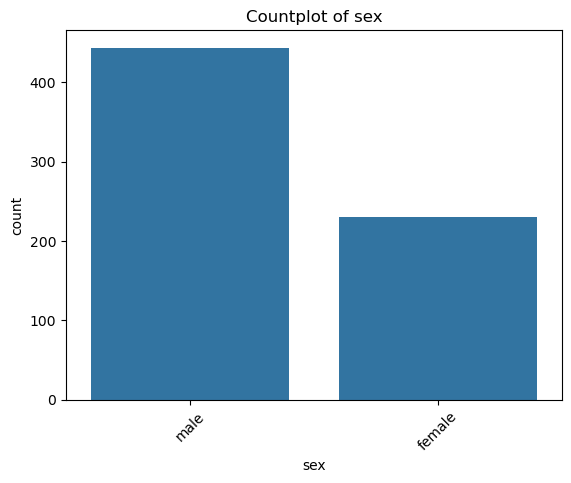

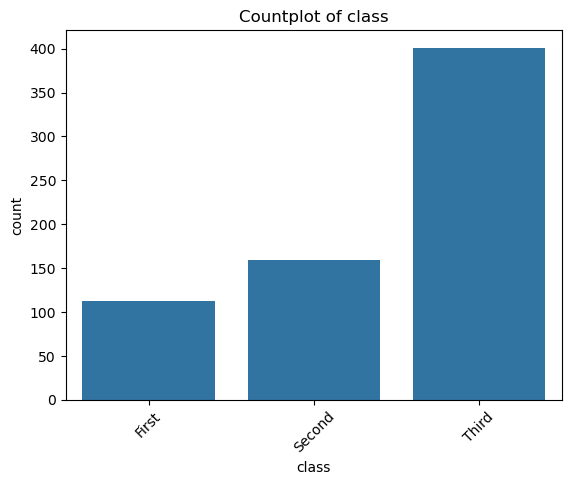

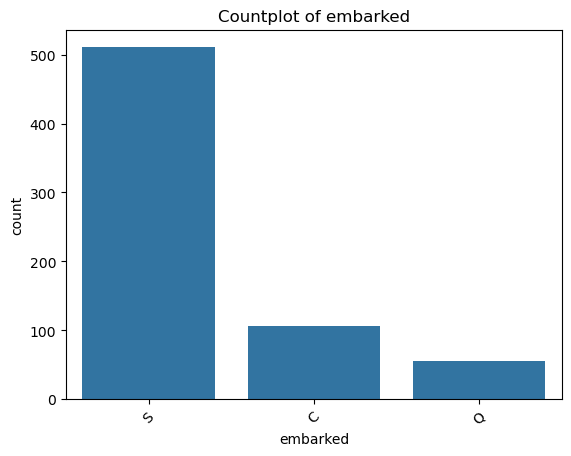

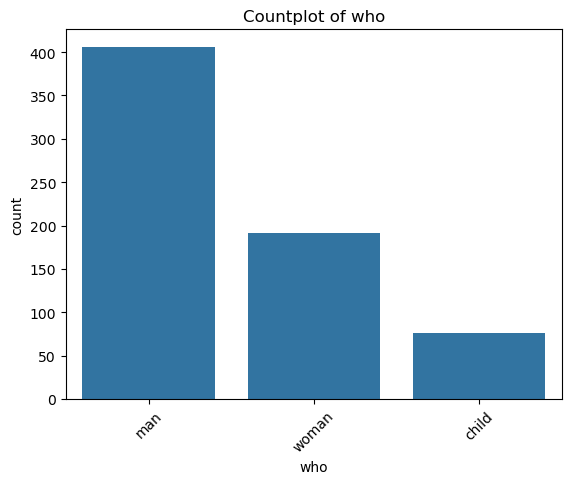

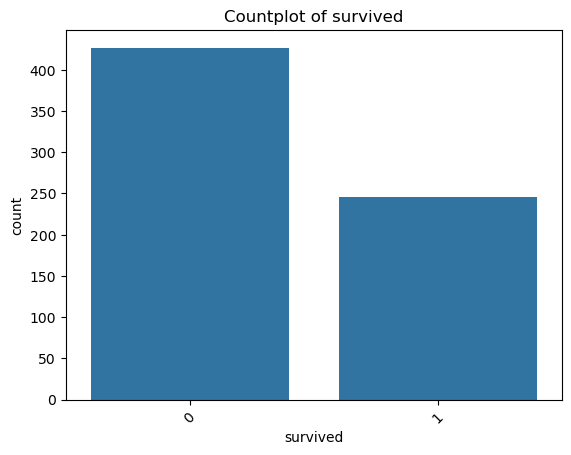

> **Histograms for Numeric Distributions**

In \[58\]:

    numeric_cols = ['age', 'fare']

    for col in numeric_cols:
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

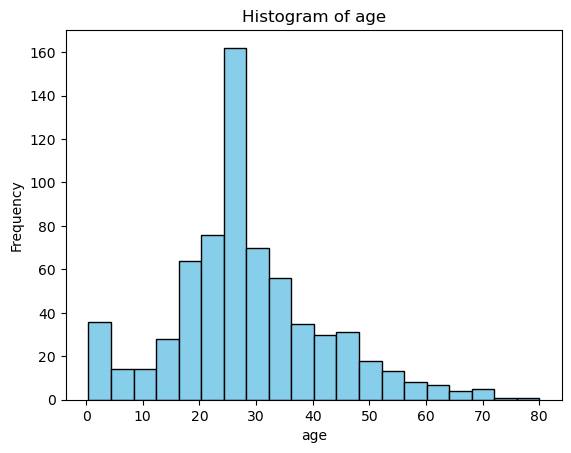

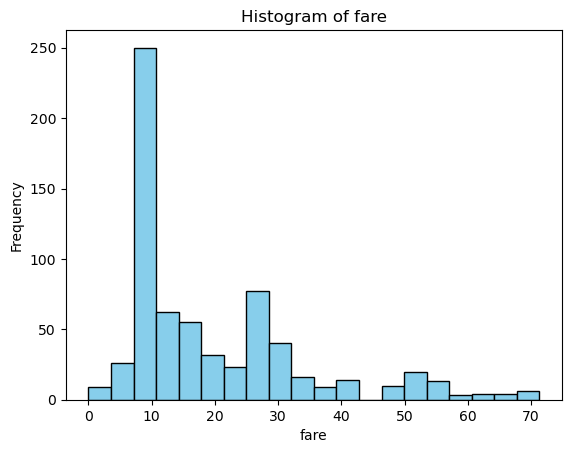

> \***Correlation Heatmap**\*

In \[64\]:

    # Computing correlation only for numeric columns
    corr = df.corr(numeric_only=True)

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

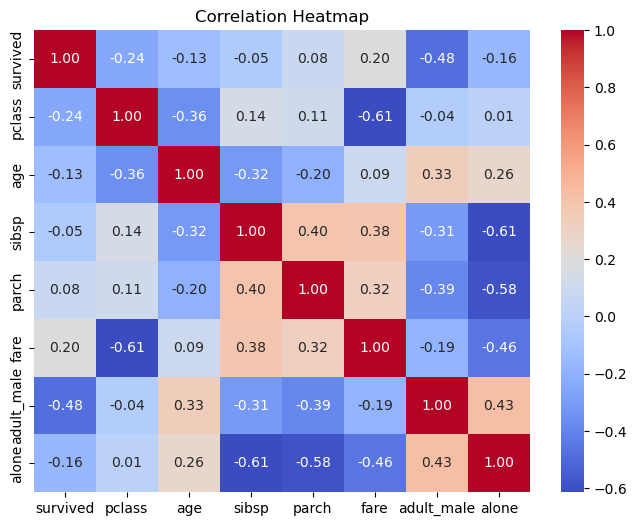

**Summary of Insights**

> Survival Rate: More females survived than males. Women and children
> had a higher chance of survival.

> Passenger Class: Survival was higher in 1st class and lowest in 3rd
> class.

> Age Distribution: Most passengers were between 20-40 years.

> Fare: A majority of passengers paid lower fares. Outliers existed but
> were cleaned.

> Embarkation Port: Most passengers boarded from port 'S'.

\***Correlation:**\*

> Strong positive correlation between fare and pclass (higher class,
> higher fare).

> Moderate negative correlation between pclass and survived.